In [1]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta
today = date.today()

d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=365)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

data = yf.download('TSLA', 
                      start=start_date, 
                      end=end_date, 
                      progress=False)
data["Date"] = data.index
data = data[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]
data.reset_index(drop=True, inplace=True)
print(data.tail())

          Date        Open        High         Low       Close   Adj Close  \
246 2024-05-08  171.589996  176.059998  170.149994  174.720001  174.720001   
247 2024-05-09  175.009995  175.619995  171.369995  171.970001  171.970001   
248 2024-05-10  173.050003  173.059998  167.750000  168.470001  168.470001   
249 2024-05-13  170.000000  175.399994  169.000000  171.889999  171.889999   
250 2024-05-14  174.500000  179.490005  174.070007  177.550003  177.550003   

       Volume  
246  79969500  
247  65950300  
248  72627200  
249  67018900  
250  86231200  


Dans ce projet, on va explorer la méthode de prévision de séries chronologiques ARIMA (Autorégressive Integrated Moving Average), reproduire les étapes décrites dans un tutoriel en ligne et ensuite, étendre notre compréhension en répondant à des questions spécifiques.

•	Objectifs du projet :

      - Comprendre les concepts de base de la prévision de séries chronologiques. 
      - Acquérir de l'expérience pratique dans l'implémentation de modèles ARIMA. 
      - Interpréter les résultats de la prévision et évaluer la performance du modèle.


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       251 non-null    datetime64[ns]
 1   Open       251 non-null    float64       
 2   High       251 non-null    float64       
 3   Low        251 non-null    float64       
 4   Close      251 non-null    float64       
 5   Adj Close  251 non-null    float64       
 6   Volume     251 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 13.9 KB


In [3]:
#We only need the date and close prices columns for the rest of the task, so let’s select both the columns and move further
data = data[["Date", "Close"]]
print(data.head())

        Date       Close
0 2023-05-16  166.520004
1 2023-05-17  173.860001
2 2023-05-18  176.889999
3 2023-05-19  180.139999
4 2023-05-22  188.869995


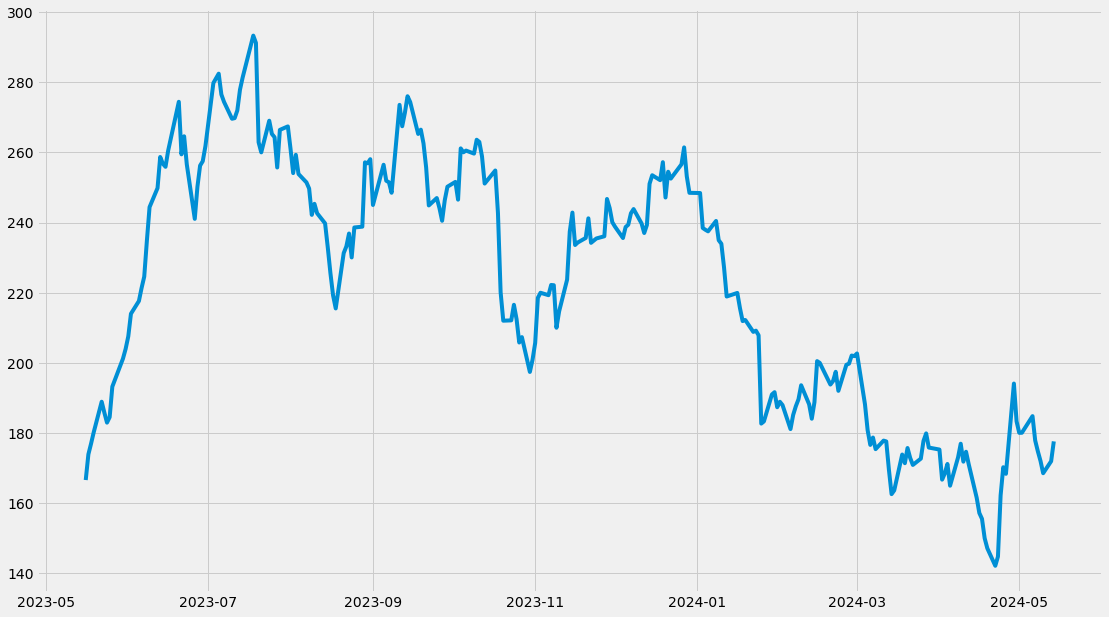

In [4]:
#Now let’s visualize the close prices of Tesla before moving forward:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.figure(figsize=(17, 10))
plt.plot(data["Date"], data["Close"])

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 432x288 with 0 Axes>

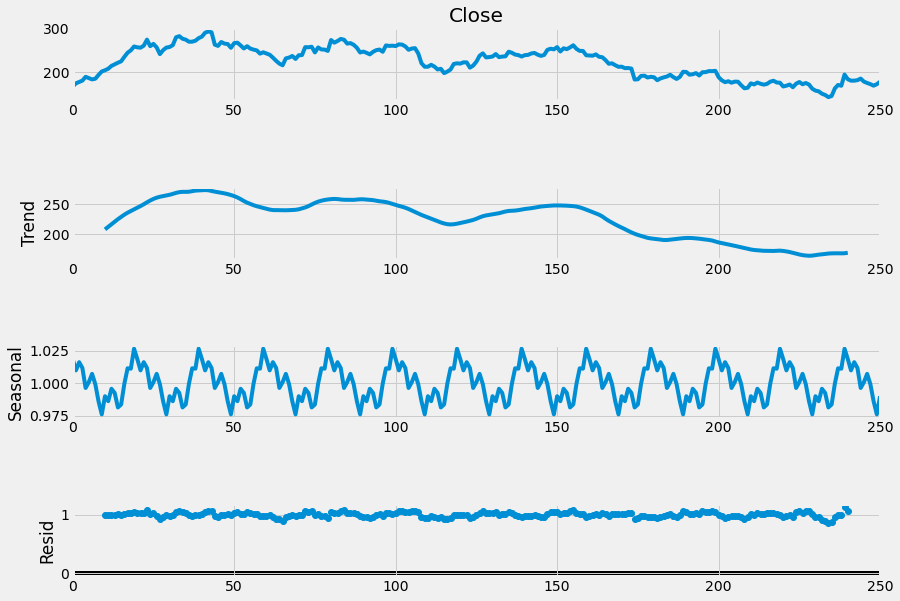

In [5]:
import statsmodels.api as sm

# Perform seasonal decomposition
decomposition = sm.tsa.seasonal_decompose(data["Close"], model='multiplicative', period=20)  # Assuming seasonal period of 12 (monthly data)
# Plot the decomposition
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 10)
plt.show

The data shown in the picture appears to be decomposed into its components: Trend, Seasonal, and Residual (Resid).

Top Plot: Close: This plot shows the original data, which appears to have an upward trend and some periodic fluctuations.

Second Plot: Trend: This plot isolates the trend component of the data, showing an upward trend over time.

Third Plot: Seasonal: This plot shows the seasonal component, indicating regular periodic fluctuations.

Bottom Plot: Resid (Residual): This plot shows the residual component, which is the remaining part of the data after removing the trend and seasonal components. It appears relatively stationary (mean and variance seem constant over time).

Based on these observations:

The data is not stationary as there is a clear trend and periodic seasonal patterns. Stationary data has a constant mean and variance over time, which is not the case here.
The data is seasonal as evidenced by the regular periodic fluctuations shown in the Seasonal component plot.
Thus, the data exhibits seasonality rather than being stationary.

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

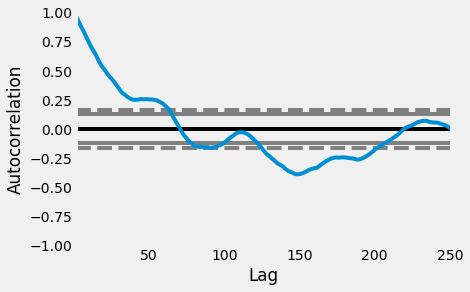

In [6]:
pd.plotting.autocorrelation_plot(data["Close"])

The image shows an autocorrelation plot, also known as a correlogram. This type of plot is used to display the autocorrelation of a time series as a function of its lag. Here are the key elements of the plot:

Y-axis (Autocorrelation): This axis displays the autocorrelation values which range from -1.00 to 1.00.
X-axis (Lag): This axis displays the lag values, ranging from 0 to 250.
Blue Line: This line represents the autocorrelation values for different lags. It starts high (close to 1.00) and gradually decreases, showing a decaying pattern, and oscillates around 0.00 before rising again toward 0.25 at the end.
Confidence Intervals: The plot includes horizontal dashed lines and shaded areas representing confidence intervals. The black horizontal line is at 0.00, indicating no autocorrelation.
Regarding finding the p-value:

To determine the p-value from an autocorrelation plot, you generally need to perform a statistical test like the Ljung-Box test, which cannot be directly inferred from the plot itself without additional statistical calculations or context. The plot provides visual insight, but calculating the p-value requires specific statistical data and tests.

In a general sense, significant autocorrelation values that lie outside the confidence intervals (shaded areas) suggest that the time series data has a significant autocorrelation at those lags. To find the exact p-value, you would typically use statistical software or a statistical test such as the Ljung-Box Q-test.

For visual inspection:

Autocorrelation values outside the confidence intervals imply potential significance.
Lag values where the blue line crosses the confidence interval lines could be points of interest for further statistical testing.



I apologize for the confusion in my previous responses. In the context of an ARIMA model, the p-value typically refers to the significance level of the lag term included in the autoregressive (AR) component of the model.

In an autocorrelation plot for an ARIMA model, the p-value corresponds to the lag at which the autocorrelation crosses the confidence interval bounds. This lag value indicates the number of lag observations included in the AR component of the ARIMA model.

To determine the p-value from the autocorrelation plot:

Identify the lag at which the autocorrelation crosses the confidence interval bounds.
This lag value represents the p-value for the AR component of the ARIMA model.
If you provide the specific lag value at which the autocorrelation crosses the confidence interval bounds in the autocorrelation plot, I can help determine the corresponding p-value for your ARIMA model.

In the above autocorrelation plot, the curve is moving down after the 2nd line of the fourth boundary. That is how to decide the p-value. Hence the value of p is 5. Now let’s find the value of q (moving average):

In the above partial autocorrelation plot, we can see that only two points are far away from all the points. That is how to decide the q value. Hence the value of q is 2. Now let’s build an ARIMA model:

The value of d is either 0 or 1. If the data is stationary, we should use 0, and if the data is seasonal, we should use 1. As our data is seasonal, we should use 1 as the d value.

In [8]:
p, d, q = 8, 1, 2
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(data["Close"], order=(p,d,q))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.w

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  250
Model:                 ARIMA(8, 1, 2)   Log Likelihood                -838.694
Method:                       css-mle   S.D. of innovations              6.909
Date:                Wed, 15 May 2024   AIC                           1701.388
Time:                        10:00:03   BIC                           1743.646
Sample:                             1   HQIC                          1718.396
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.1100      0.270     -0.408      0.683      -0.639       0.419
ar.L1.D.Close     1.5231      0.565      2.697      0.007       0.416       2.630
ar.L2.D.Close    -0.5763      0.605     

Here’s how to predict the values using the ARIMA model:


In [9]:
predictions = fitted.predict()
print(predictions)

2      0.273152
3     -0.067451
4     -0.116457
5      0.817309
6     -0.806968
         ...   
246    0.512182
247    0.076121
248    0.420369
249   -0.609580
250    1.163864
Length: 249, dtype: float64


In [10]:
import statsmodels.api as sm
import warnings
model=sm.tsa.statespace.SARIMAX(data['Close'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  251
Model:             SARIMAX(8, 1, 2)x(8, 1, 2, 12)   Log Likelihood                -812.102
Date:                            Wed, 15 May 2024   AIC                           1666.204
Time:                                    10:17:05   BIC                           1739.122
Sample:                                         0   HQIC                          1695.591
                                            - 251                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6882      1.793      0.384      0.701      -2.825       4.202
ar.L2         -0.4499      1.125   

In the SARIMAX model, the parameter 12 in seasonal_order=(p, d, q, 12) indicates the seasonal periodicity of the data. In other words, it specifies that the data exhibits seasonality with a period of 12.

In many contexts, particularly in monthly time series where each observation represents a month, a seasonal period of 12 is commonly used because there are 12 months in a year. Thus, this indicates that the SARIMAX model should account for annual seasonality in the data, where seasonal effects repeat each year.

However, it's worth noting that in other contexts where data may exhibit seasonality over a different period (for example, weekly with a period of 7), you will need to adjust this parameter accordingly. In this case, 12 is simply the common choice for month-based data, but this may vary depending on the specific nature of your data.

In [15]:
predictions = model.predict(len(data), len(data)+19)
print(predictions)

251    178.310829
252    173.101910
253    171.646484
254    171.574155
255    169.879475
256    171.398785
257    171.910650
258    171.205040
259    169.731907
260    169.370851
261    168.424644
262    168.690504
263    169.180874
264    166.885524
265    166.733810
266    167.552266
267    166.716784
268    167.311893
269    168.052578
270    168.376472
Name: predicted_mean, dtype: float64


<AxesSubplot:>

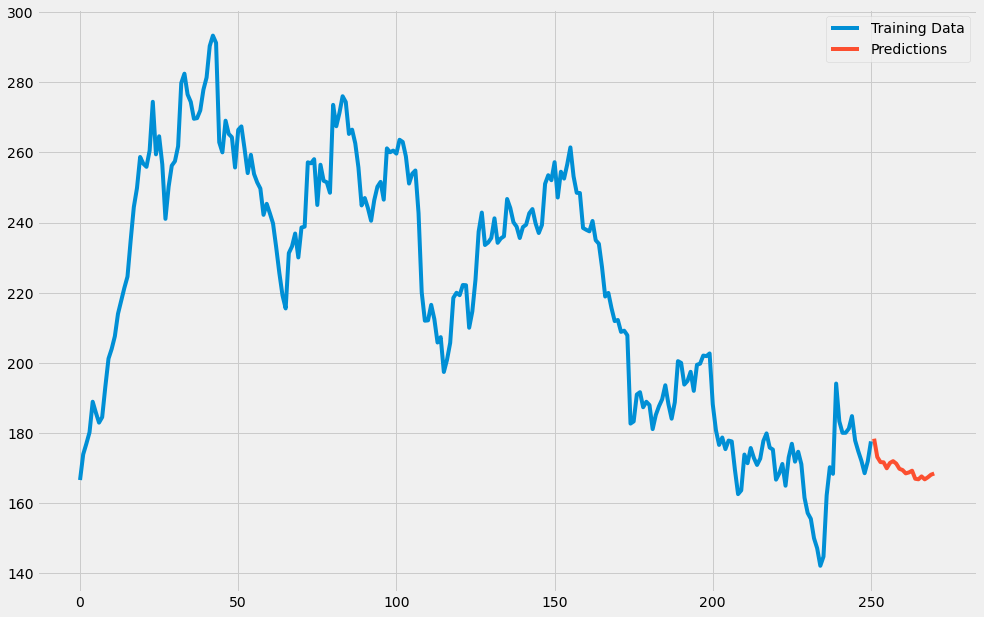

In [16]:
#Here’s how you can plot the predictions:

data["Close"].plot(legend=True, label="Training Data", figsize=(15, 10))
predictions.plot(legend=True, label="Predictions")